In [1]:
import TurbPy as tb
from TurbPy.imports import *

In [2]:
# deck = 'KH_Lv1di/'
# deck = 'KH/'
# deck = 'KH_subash/'
# deck = 'KH_new/'
# deck = 'KH_800ppc/'
# deck = 'KH_800ppc_500int/'
# deck = 'KH_400ppc_500int/'
# deck = 'KH_400ppc/'
# deck = '/GEM_feb26/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'
# deck = 'KH_beta0.1/'
# deck = 'KH_400ppc_200wci2/'
deck = 'KH_200ppc_200wci/'

dirs = '/pscratch/sd/g/goodwill/' + deck

figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twce = np.linspace(0, times[-1] * info['dt*wce'], len(times))
twpe = np.linspace(0, times[-1] * info['dt*wpe'], len(times))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

lx = info['Lx/di']
ly = info['Ly/di']
nx = int(info['nx'])
ny = int(info['ny'])

In [3]:
print(info['dt*wci'] * 562000)

155.23204320000002


In [4]:
dt = info['dt*wpe'] * info['fields_interval']

In [5]:
# from TurbPy.vpic_info import *
# from TurbPy.load_vars import *
# import numpy as np
# import pandas as pd

# def JE_calc(dirs, filt = True, save = True):
#   vpic_info = get_vpic_info(dirs)
#   times = get_times(dirs)

#   dx = vpic_info['dx/de']
  
  
#   ds = pd.DataFrame({'JE': [],
#                      'Jx': [],
#                      'Jy': [],
#                      'Jz': [],
#                      'Ex': [],
#                      'Ey': [],
#                      'Ez': []}
#                      )
#   # J_av = np.zeros(len(times))
#   # E_av = np.zeros(len(times))
#   # JE_av = np.zeros(len(times))
#   # jeE_av = np.zeros(len(times))
#   # jiE_av = np.zeros(len(times))
#   # E_m = np.zeros(len(times))

#   for t in np.arange(0,len(times)):
#     if t %10 == 0:
#         print(t)
#     if filt == False:
#       sp = 'electron'
#       jxe = load_var('jx', dirs, times[t], sp)
#       jye = load_var('jy', dirs, times[t], sp)
#       jze = load_var('jz', dirs, times[t], sp)

#       sp = 'ion'
#       jxi = load_var('jx', dirs, times[t], sp)
#       jyi = load_var('jy', dirs, times[t], sp)
#       jzi = load_var('jz', dirs, times[t], sp)

#       jx0 = jxe + jxi
#       jy0 = jye + jyi 
#       jz0 = jze + jzi

#       ex = load_var('ex', dirs, times[t])
#       ey = load_var('ey', dirs, times[t])
#       ez = load_var('ez', dirs, times[t])

#       jeE = (jxe * ex) + (jye * ey) + (jze * ez)
#       jiE = (jxi * ex) + (jyi * ey) + (jzi * ez)
#       JE  = (jx0 * ex) + (jy0 * ey) + (jz0 * ez)
#     if filt == True:
#       el = load_hydro_fil(dirs, times[t], species = 'electron')
#       ion = load_hydro_fil(dirs, times[t], species = 'ion')
#       f = load_field_fil(dirs, times[t])

#       ex = f['ex']
#       ey = f['ey']
#       ez = f['ez']

#       jx0 = el['jx'] + ion['jx']
#       jy0 = el['jy'] + ion['jy']
#       jz0 = el['jz'] + ion['jz']
#       JE  = (jx0 * f['ex']) + (jy0 * f['ey']) + (jz0 * f['ez'])
#       # plt.pcolormesh(JE)


#     row = pd.DataFrame(
#           {'JE': [np.mean(JE ,dtype = np.float64) ],
#            'Jx': [np.mean(jx0,dtype = np.float64)],
#            'Jy': [np.mean(jy0,dtype = np.float64)],
#            'Jz': [np.mean(jz0,dtype = np.float64)],
#            'Ex': [np.mean(ex ,dtype = np.float64) ],
#            'Ey': [np.mean(ey ,dtype = np.float64) ],
#            'Ez': [np.mean(ez ,dtype = np.float64) ]})

#     ds = pd.concat([ds, row], ignore_index = True)
#     # Jx_av[t] = np.average(jx0)
#     # Jy_av[t] = np.average(jy0)
#     # Jz_av[t] = np.average(jz0)
#     # Ex_av[t] = np.average(ex)
#     # Ey_av[t] = np.average(ey)
#     # Ez_av[t] = np.average(ez)
#     # JE_av[t]  = np.average(JE)
#     # jeE_av[t] = np.average(jeE)
#     # jiE_av[t] = np.average(jiE)
#   if save == True:
#     # pd.DataFrame({'JE': JE_av, 'Jx': J_av, 'E': E_av}).to_csv(dirs + 'JE_av.csv', sep = ',')
#     ds.to_csv(dirs + 'JE_av.csv', sep = ',')
#   return ds

# def read_JE(dirs):
#   ds = pd.read_csv(dirs + 'JE_av.csv', delimiter = ',')
#   # JE = ds['JE']
#   return ds

In [6]:
# Calculate ###
ds = tb.JE_av(dirs, filt = True)

# ds = JE_calc(dirs, filt = True)
# en = tb.en_calc(dirs)

In [7]:
# # ## Read ##
ds = tb.read_JE(dirs)
en = tb.read_calc_energies(dirs)/(info['Lx/de'] * info['Ly/de'] * info['Lz/de'])

In [8]:
# print(ds['JE'][0])

In [9]:
# print((ds['JE'].dtype))

In [10]:
n = 20
twciN = twci[n:]

print(len(twciN))
print(twci[n])
# JE_int = -sci.integrate.cumulative_trapezoid(ds['JE'][n:] * dt, initial = 0)
# JE_int=  -np.cumsum(ds['JE'][n:] * dt)
# JE_int_fil = -sci.integrate.cumulative_simpson(ds_fil['JE'][n:] * dt, initial = 0)
JE_int = -sci.integrate.cumulative_simpson(ds['JE'][n:] * dt, initial = 0)
dE = en['EM'][n:]-en['EM'][n]+en['EE'][n:]-en['EE'][n]

nfac = int(len(en_out)/len(en)) * n
twciN_out = twci_out[nfac:]
dE_out = en_out['EM'][nfac:]-en_out['EM'][nfac]+en_out['EE'][nfac:]-en_out['EE'][nfac]
# print(len(JE_int))
# print(dt)

1105
2.762136000000001


In [11]:
print(JE_int)

[-0.00000000e+00 -1.11038148e-05 -1.22449420e-05 ...  1.41074008e-03
  1.41453172e-03  1.41894614e-03]


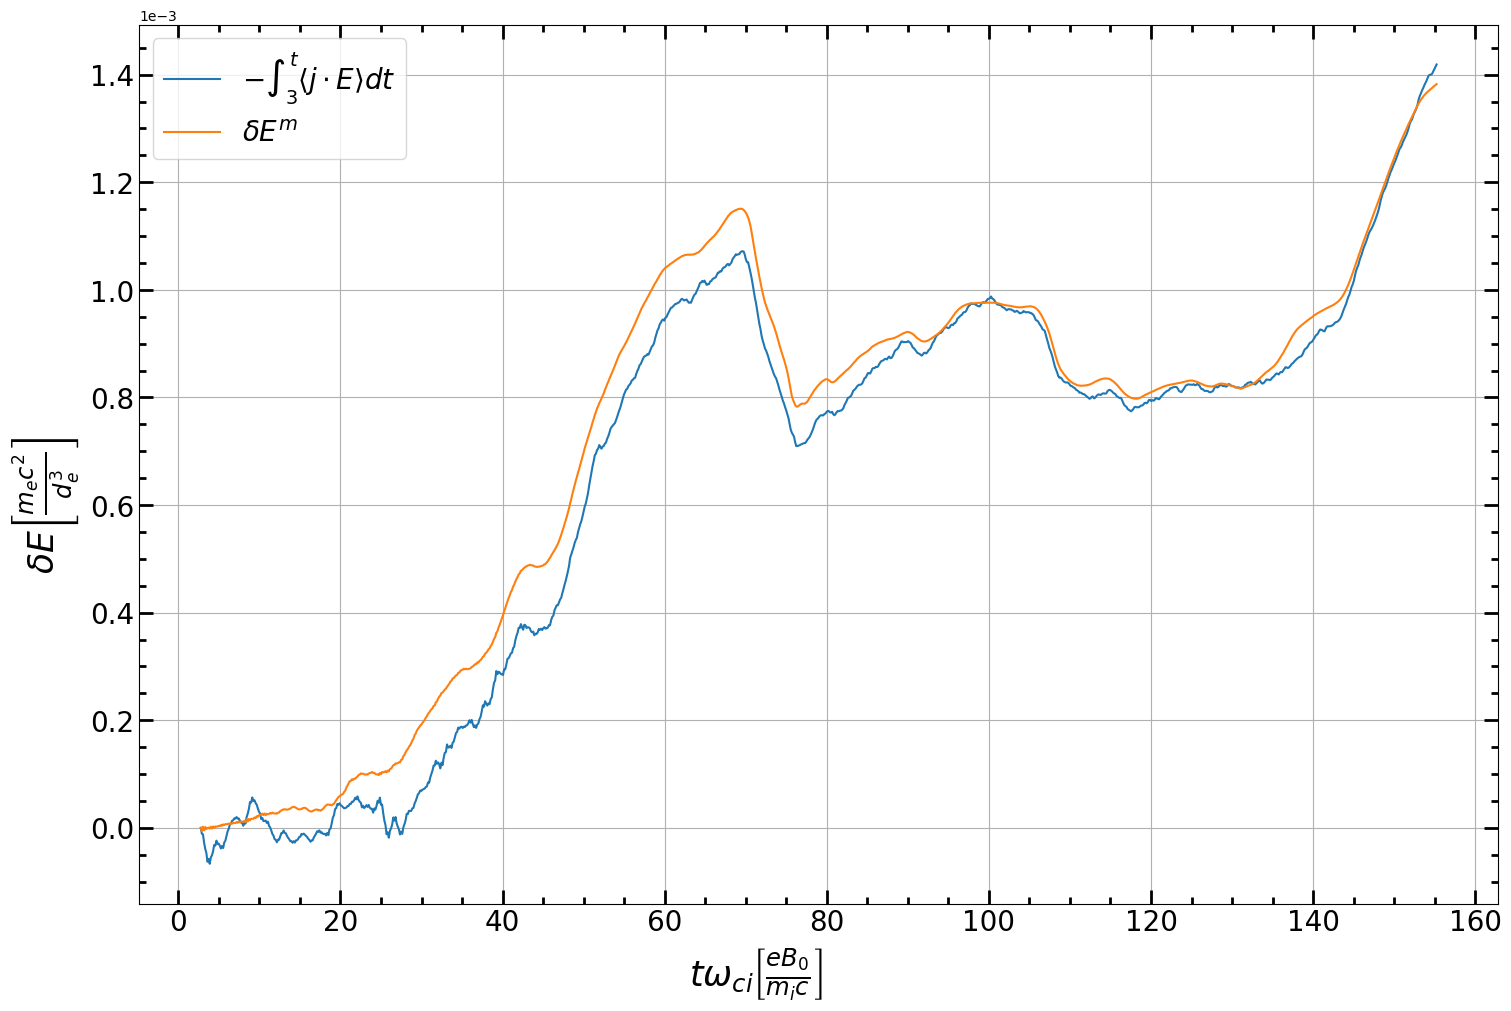

In [12]:
fig, axs = plt.subplots(1,1, figsize=(15, 10), sharex = True, layout='constrained')
axs.plot(twciN, JE_int, 
         label=r'$-\int_{'f'{int(np.round(twci[n],0))}'r'}^t \langle j\cdot E \rangle dt$')
axs.plot(twciN, dE, label=r'$\delta E^m$')
# axs.plot(twciN_out, dE_out, label=r'$\delta E^m$')
axs.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs.legend(loc = 'upper left', fontsize = 20)
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(which='both', width=2, labelsize = 20, right = True, direction = 'in')
axs.tick_params(which='major', length=10, top = True, right =True)
axs.tick_params(which='minor', length=5 , top = True, right =True)
axs.grid()

fig.supylabel(r'$\delta E \left[ \frac{m_e c^2}{d_e^3} \right] $', size = 25)
fig.supxlabel(r'$ t \omega_{ci} \left[ \frac{e B_0}{m_i c} \right]$', size = 25)

plt.savefig(figs + 'JE_dEM.jpg', dpi = 400)

In [13]:
# # deck = 'KH_Lv1di/'
# # deck = 'KH/'
# # deck = 'KH_subash/'
# # deck = 'KH_new/'
# deck = 'KH_400ppc/'
# # deck = '/GEM_feb26/'
# # deck = 'turb2/'
# # deck = 'turb_vth0.01/'
# # deck = 'KH_beta0.1/'

# dirs = '/pscratch/sd/g/goodwill/' + deck

# # figs = '/pscratch/sd/g/goodwill/Fig/' + deck

# info4 = tb.get_vpic_info(dirs)
# times4 = tb.get_times(dirs)
# en_out = tb.read_energies(dirs)

# twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
# twce4 = np.linspace(0, times4[-1] * info['dt*wce'], len(times4))
# twpe4 = np.linspace(0, times4[-1] * info['dt*wpe'], len(times4))
# twci4 = np.linspace(0, times4[-1] * info['dt*wci'], len(times4))

# lx = info['Lx/di']
# ly = info['Ly/di']
# nx = int(info['nx'])
# ny = int(info['ny'])

# ds4 = tb.read_JE(dirs)
# en4 = tb.read_calc_energies(dirs)/(info['Lx/de'] * info['Ly/de'] * info['Lz/de'])

In [14]:
# fig, axs = plt.subplots(1,1, figsize=(15, 10), sharex = True, layout='constrained')
# nppc = int(info['nppc'])
# axs.plot(twci, -sci.integrate.cumulative_trapezoid(ds['JE'] * dt, initial = 0), marker = 'x', label=r'$-\int_0^t \langle j\cdot E \rangle dt$'f'({nppc} nppc)')
# axs.plot(twci, en['EM']-en['EM'][0]+en['EE']-en['EE'][0],marker = 'x', label=r'$\delta E^m$'f'({nppc} nppc)')

# nppc4 = int(info4['nppc'])
# axs.plot(twci4, -sci.integrate.cumulative_trapezoid(ds4['JE'] * dt, initial = 0), marker = 'x', label=r'$-\int_0^t \langle j\cdot E \rangle dt$'f'({nppc4} nppc)')
# axs.plot(twci4, en4['EM']-en4['EM'][0]+en4['EE']-en4['EE'][0],marker = 'x', label=r'$\delta E^m$'f'({nppc4} nppc)')

# axs.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
# axs.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
# axs.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
# axs.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
# axs.legend(loc = 'upper left', fontsize = 20)
# axs.xaxis.set_minor_locator(AutoMinorLocator())
# axs.yaxis.set_minor_locator(AutoMinorLocator())
# axs.tick_params(which='both', width=2, labelsize = 20, right = True, direction = 'in')
# axs.tick_params(which='major', length=10, top = True, right =True)
# axs.tick_params(which='minor', length=5 , top = True, right =True)
# axs.grid()

# fig.supylabel(r'$\delta E \left[ \frac{m_e c^2}{d_e^3} \right] $', size = 25)
# fig.supxlabel(r'$ t \omega_{ci} \left[ \frac{e B_0}{m_i c} \right]$', size = 25)

# # plt.savefig(figs + 'JE_dEM.jpg', dpi = 400)